Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters: {'C': 10, 'gamma': 'scale'}


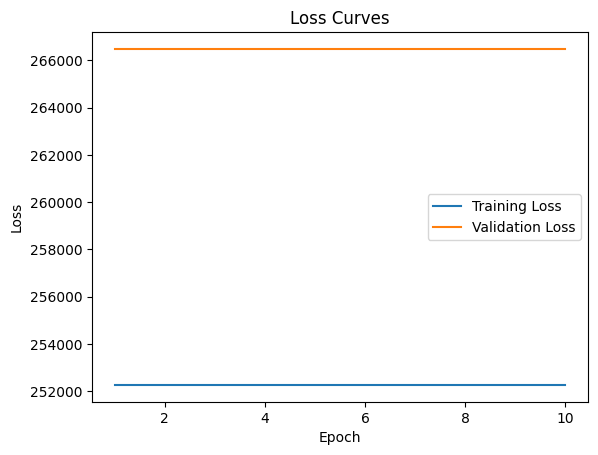

The model is overfitting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('data-sets/alcohol_sales.csv')

# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

# Set date column as the index of the DataFrame
data = data.set_index('date')

# Split data into features and target
X = data.index.values.astype(float).reshape(-1, 1)
y = data['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression model
model = SVR()

# Cross-validation and training settings
k_folds = 5
n_epochs = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

train_losses = []
val_losses = []

# Train the model for a specified number of epochs
for epoch in range(n_epochs):
    # Train the model on the full training set
    best_model.fit(X_train, y_train)

    # Calculate training loss
    y_train_pred = best_model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Calculate validation loss using cross-validation
    val_losses_epoch = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    val_loss = np.mean(val_losses_epoch)
    val_losses.append(val_loss)

# Plot the training and validation loss curves
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# Determine if the model is overfitting or underfitting
if min(val_losses) > min(train_losses):
    print('The model is overfitting.')
elif max(val_losses) < max(train_losses):
    print('The model is underfitting.')
else:
    print('The model has a good balance between bias and variance.')
